In [1]:
import numpy as np
import pylab as plt

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
from tensorflow.python.ops import ctc_ops as ctc

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

np.random.seed(7)

Using TensorFlow backend.


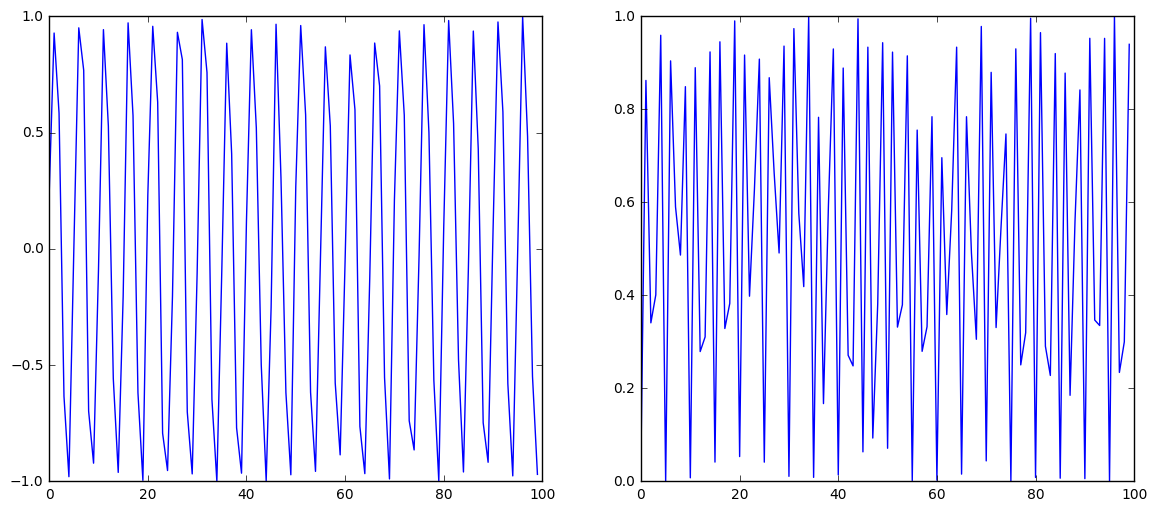

In [2]:
def gen_data(num_samples, sampling_rate, distortion=0.0):
    frequency = 10.0
    t = np.arange(num_samples)/np.float(sampling_rate)
    x = np.sin(2.0 * np.pi * frequency * t + 1.0 * np.random.randn(t.size)/np.sqrt(np.float(sampling_rate)))
    y = x**2 + distortion * np.random.randn(x.size)
    return x, y

x, y = gen_data(100, 50, distortion = 0.0)
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(x)
plt.subplot(122)
plt.plot(y)

In [3]:
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [4]:
x = np.reshape(x, (x.shape[0], 1, 1))
x[0]

array([[ 0.23680543]])

In [5]:
model.fit(x, y, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.3213
Epoch 2/100
0s - loss: 0.2236
Epoch 3/100
0s - loss: 0.1645
Epoch 4/100
0s - loss: 0.1292
Epoch 5/100
0s - loss: 0.1087
Epoch 6/100
0s - loss: 0.0960
Epoch 7/100
0s - loss: 0.0874
Epoch 8/100
0s - loss: 0.0813
Epoch 9/100
0s - loss: 0.0757
Epoch 10/100
0s - loss: 0.0707
Epoch 11/100
0s - loss: 0.0656
Epoch 12/100
0s - loss: 0.0607
Epoch 13/100
0s - loss: 0.0553
Epoch 14/100
0s - loss: 0.0502
Epoch 15/100
0s - loss: 0.0453
Epoch 16/100
0s - loss: 0.0398
Epoch 17/100
0s - loss: 0.0346
Epoch 18/100
0s - loss: 0.0297
Epoch 19/100
0s - loss: 0.0250
Epoch 20/100
0s - loss: 0.0207
Epoch 21/100
0s - loss: 0.0168
Epoch 22/100
0s - loss: 0.0133
Epoch 23/100
0s - loss: 0.0103
Epoch 24/100
0s - loss: 0.0079
Epoch 25/100
0s - loss: 0.0059
Epoch 26/100
0s - loss: 0.0044
Epoch 27/100
0s - loss: 0.0033
Epoch 28/100
0s - loss: 0.0025
Epoch 29/100
0s - loss: 0.0019
Epoch 30/100
0s - loss: 0.0016
Epoch 31/100
0s - loss: 0.0013
Epoch 32/100
0s - loss: 0.0012
Epoch 33/100
0s -

In [11]:
x, y = gen_data(20, 50)
x = np.reshape(x, (x.shape[0], 1, 1))
y_predict = model.predict(x)

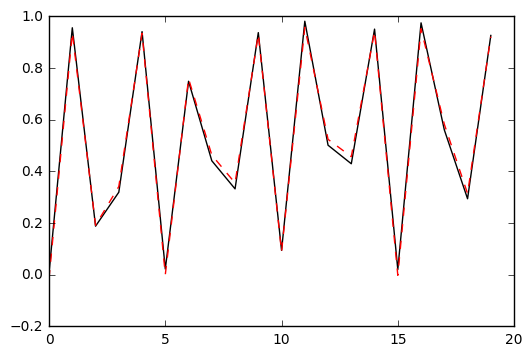

In [12]:
plt.plot(y, 'k-')
plt.plot(y_predict, 'r--')